#Data Loading

In [ ]:
!wget https://github.com/SaadatChowdhury/BHaND/raw/master/Dataset/bhand.pkl.gz

--2022-03-03 09:38:36--  https://github.com/SaadatChowdhury/BHaND/raw/master/Dataset/bhand.pkl.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SaadatChowdhury/BHaND/master/Dataset/bhand.pkl.gz [following]
--2022-03-03 09:38:37--  https://raw.githubusercontent.com/SaadatChowdhury/BHaND/master/Dataset/bhand.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56765749 (54M) [application/octet-stream]
Saving to: ‘bhand.pkl.gz’

bhand.pkl.gz        100%[===================>]  54.14M   206MB/s    in 0.3s    

2022-03-03 09:38:37 (206 MB/s) - ‘bhand.pkl.gz’ saved [56765749/56765749]



In [ ]:
import gzip
import pickle
import numpy as np

f = gzip.open('/content/bhand.pkl.gz','rb')
trainSet,validSet,testSet = pickle.load(f, encoding = 'bytes')
f.close()


In [ ]:
X_train, y_train = trainSet
X_val, y_val = validSet
X_test, y_test = testSet

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:

len(X_train[0])

1024

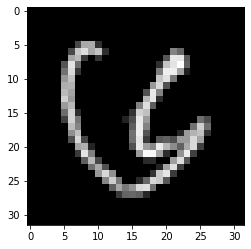

In [ ]:
import matplotlib.pyplot as plt
img = np.resize(X_train[0], (32,32))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
y_train[0]

6

In [ ]:
print(len(X_train)+len(X_val)+len(X_test))

70000


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


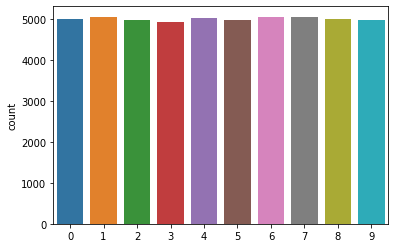

In [ ]:
sns.countplot(y_train)

In [ ]:
X_train_norm = X_train.astype('float64')/255.
X_val_norm = X_val.astype('float64')/255.
X_test_norm = X_test.astype('float64')/255.

In [ ]:
X_train_norm = X_train_norm.reshape(50000,32,32,1)
X_val_norm = X_val_norm.reshape(10000,32,32,1)
X_test_norm = X_test_norm.reshape(10000,32,32,1)
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [ ]:
print(y_train[0], y_train_oh[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'Same', activation='relu', input_shape=(32, 32, 1)))
model.add(layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), (2,2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        3

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', #quantity to be monitored.
                                            patience=3, # number of epochs with no improvement after which learning rate will be reduced.
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        shear_range=10,  # shear angle in counter-clockwise direction in degrees
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train_norm)

In [ ]:
augmented_training_set = datagen.flow(X_train_norm,y_train_oh, batch_size=86)

In [ ]:
training_history = model.fit_generator(augmented_training_set,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_val_norm, y_val_oh),
                             callbacks=[learning_rate_reduction])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


582/582 [==============================] - 34s 57ms/step - loss: 0.0813 - accuracy: 0.9785 - val_loss: 13.9715 - val_accuracy: 0.0824 - lr: 0.0010
Epoch 2/20
582/582 [==============================] - 33s 56ms/step - loss: 0.0784 - accuracy: 0.9795 - val_loss: 1.7294 - val_accuracy: 0.4475 - lr: 0.0010
Epoch 3/20
582/582 [==============================] - 32s 56ms/step - loss: 0.0820 - accuracy: 0.9786 - val_loss: 1.4539 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 4/20
582/582 [==============================] - 33s 56ms/step - loss: 0.0827 - accuracy: 0.9787 - val_loss: 0.7374 - val_accuracy: 0.8130 - lr: 0.0010
Epoch 5/20
582/582 [==============================] - 33s 57ms/step - loss: 0.0870 - accuracy: 0.9772 - val_loss: 51.1080 - val_accuracy: 0.2193 - lr: 0.0010
Epoch 6/20
582/582 [==============================] - 33s 56ms/step - loss: 0.0863 - accuracy: 0.9780 - val_loss: 164.6790 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 7/20
582/582 [==============================] - ETA: 0s - l

In [ ]:
test_eval = model.evaluate(X_test_norm, y_test_oh, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.035626817494630814
Test accuracy: 0.992900013923645


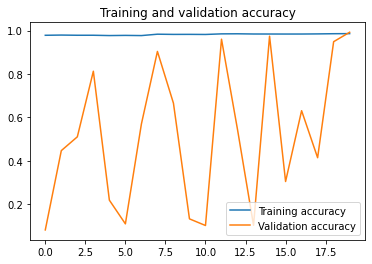

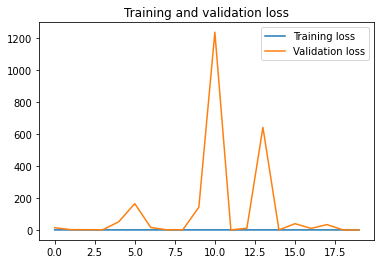

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(X_test_norm)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

correct labels - 9887


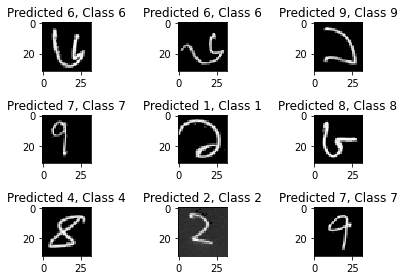

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print(f'correct labels - {len(correct)}')
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Misclassified labels - 113


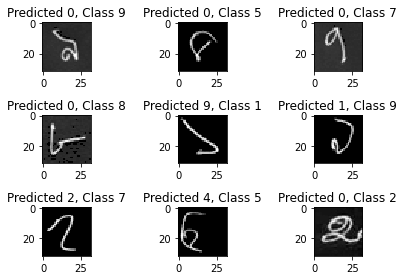

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print(f'Misclassified labels - {(y_test.shape[0]) - len(correct)}')
cnt = 0
for i in range (0,len(y_test)):
  if(predicted_classes[i]!=y_test[i]):
    
    plt.subplot(3,3,cnt+1)
    plt.imshow(X_test[i].reshape(32,32), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], y_test[i]))
    plt.tight_layout()
    cnt+=1
    if(cnt==9):
      break